**Business Problem**

XYZ Delivery company based in Delhi has a problem of low revenue and high cost in the business. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability. 

**Analysis of Cost and Protifablity of company Based in Delhi** 





In [31]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
# import Dataset

food_orders = pd.read_csv('food_orders_new_delhi.csv')

In [33]:
#Dataset info
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


we found that discount and offers has a missing data of 19.5% percentage we have to fill it with '0' as we have no info



In [34]:
food_orders['Discounts and Offers'].replace(' ','0.0')

0         5% on App
1               10%
2      15% New User
3               NaN
4      50 off Promo
           ...     
995       5% on App
996             NaN
997             NaN
998    15% New User
999    15% New User
Name: Discounts and Offers, Length: 1000, dtype: object

In [35]:
food_orders['Discounts and Offers'].isnull().sum()

np.int64(185)

In [36]:
food_orders['Discounts and Offers']=food_orders['Discounts and Offers'].fillna('0.0')

In [37]:
food_orders['Discounts and Offers'].isnull().sum()

np.int64(0)

we have fill all the null values in Discounts and Offers with '0' as it cannot be empty

In [38]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [39]:
#fix date and time in order Date and Time 
from datetime import datetime


food_orders['Order Date and Time']=pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time']=pd.to_datetime(food_orders['Delivery Date and Time'])






Now lets fix discounts and offers columns

In [40]:
food_orders['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', '0.0', '50 off Promo'],
      dtype=object)

In [41]:
#creating function to extract the details

def extract_discount(discount_str):
    if 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%'in discount_str:
        return float(discount_str.split('%')[0])
    else:
        return 0.0
    
# apply the function to create new Discount Value column

food_orders['Discount percentage']=food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))
    



In [42]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0


In [ ]:
# for percentage discounts, calculate the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount percentage'] / 100)
 if x['Discount percentage'] > 1 
 else x['Discount percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount percentage'] <= 1
else x['Order Value'] * x['Discount percentage'] / 100, axis=1)

print(food_orders[['Order Value', 'Discounts and Offers', 'Discount percentage', 'Discount Amount']].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  0.0                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount percentage              float64
Discount_Amount        

In [56]:
food_orders['Discount_Amount'].unique()

array([ 95.7 ,  98.6 , 140.55,   0.  , 996.  ,  43.9 ,  15.15,  26.  ,
        83.15,  49.1 ,  43.4 , 270.  ,  94.95, 148.8 ,  75.6 ,  70.7 ,
       899.  ,  85.7 ,  82.  ,  46.35,  96.85,  39.45, 181.1 , 150.15,
        67.  ,  77.5 ,  23.25,  94.5 ,  55.4 , 101.5 ,   8.8 ,  32.9 ,
       138.1 ,  69.35,  21.5 , 130.5 ,  99.2 , 189.1 ,  83.65,  78.7 ,
        69.95,  59.7 ,  52.8 , 134.7 , 121.4 ,  57.9 , 336.  ,  55.7 ,
       236.1 ,  46.4 ,  47.9 , 179.8 , 225.  , 177.8 , 228.45,  88.  ,
       135.3 , 166.65, 279.  ,  91.1 , 508.  , 524.5 ,  60.7 ,  71.35,
        60.  ,  34.85,  39.75, 769.  ,  56.1 ,  31.95, 778.  , 163.65,
       739.5 ,  90.9 ,  45.9 , 283.65, 203.7 ,  78.25, 307.  , 199.65,
        40.4 , 624.  ,  11.85, 219.  ,  95.4 ,  84.8 ,  72.3 , 157.3 ,
        51.9 , 178.8 ,  58.55,  46.5 , 143.1 ,  75.  , 261.75, 163.95,
       119.1 , 183.2 ,  65.7 , 719.  ,  50.  , 843.  , 842.5 , 940.5 ,
        61.8 , 134.5 , 159.1 , 919.  ,  58.05,  43.2 , 506.5 , 127.8 ,
      

Now, we have cleaned the dataset we can procced further Analysis

**Cost and Profitability Analysis**

Now we will look in cost and profitablity of the company
The only income it has is Commission Fee and the expenses are in form of Delivery fee, Payment processing fee and Discount to customer 




In [ ]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit }

print(overall_metrics)





{'Total Orders': 1000, 'Total Revenue': np.int64(126990), 'Total Costs': np.float64(232709.85), 'Total Profit': np.float64(-105719.85)}


Based on the analysis, here are the overall metrics for the food delivery operations:

Total Orders: 1,000
Total Revenue (from Commission Fees): 126,990 INR

Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)

Total Profit: -105,719.85 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

now we will use **visualization** to better understand the chart

1.Histogram to see the distribution of profitablity

2.piechart to see the the cost distribution breakdown

3.bar chart to compare the profit,cost and revenue

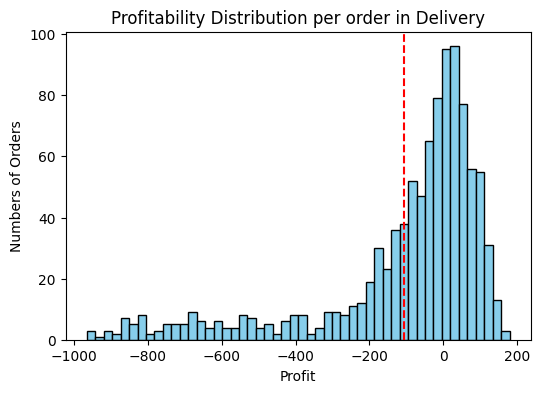

In [70]:
#histogram 

plt.figure(figsize=(6,4))
plt.hist(food_orders['Profit'],bins=50,color='skyblue',edgecolor='black')
plt.title("Profitability Distribution per order in Delivery")
plt.xlabel("Profit")
plt.ylabel("Numbers of Orders")
plt.axvline(food_orders['Profit'].mean(),color='red',linestyle= 'dashed')
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation

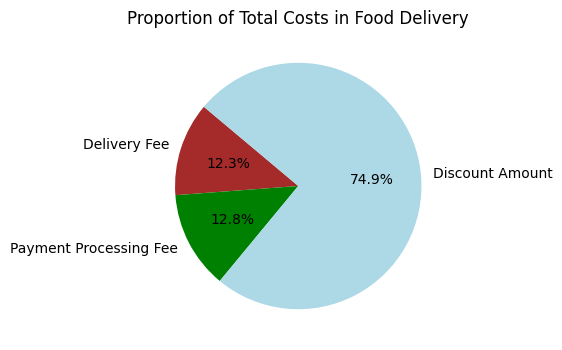

In [75]:
#piechart

costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(6, 4))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['brown', 'green', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

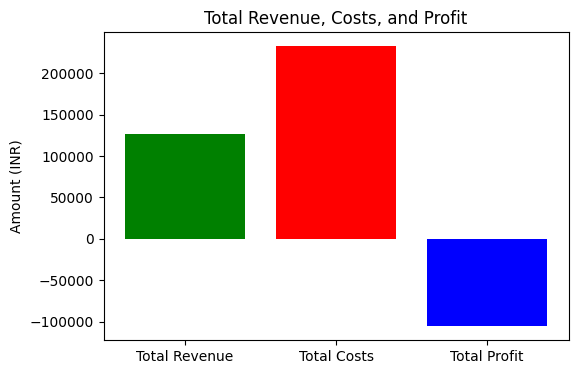

In [76]:
#Bar graph

# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(6, 4))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

**A New Strategy for Profits**


From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:



A new average commission percentage based on profitable orders.

A new average discount percentage for profitable orders, that could serve as a guideline for
 what level of discount still allows for profitability.

In [84]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

New Average Commission Percentage: 30.51%

New Average Discount Percentage: 5.87%

**Conclusion**:

The analysis of XYZ Delivery company's operations in Delhi reveals that high discounts are leading to significant financial losses, with total costs exceeding revenue. By examining profitable orders, an average commission percentage of 30.51% and an average discount percentage of 5.87% were identified as a potential "sweet spot" for profitability. The dataset was cleaned, with missing discount values filled and date-time formats standardized for accurate analysis. A bar chart visually confirms the gap between revenue, costs, and the resulting loss. Implementing these new commission and discount percentages could help optimize pricing strategies and enhance profitability.